###  1 - Baseline Variable Selection (Using Group Lasso)
For interventions where only engagement data is available in the intervention arm. You will need a set of variables that are predictive of engagement level in the intervention arm in order to estimate the compliance status of individuals in the control arm. At the **Design Stage** you need to consider the approach to choose these variables and ensure they are collected. 

The case studies used had already been conducted so there was no control over these variables. So in order to identify which variables are predictive of engagement level in the intervention arm a group lasso model was used. The notebook which walksthrough how to do this is found here - [Selecting Baseline Variables](https://imperiallondon-my.sharepoint.com/:u:/g/personal/je116_ic_ac_uk/ET80hdEA8FJKgPk-ak6WFtIB89Ix2NSAAtvAw2Mtg96LPA?e=rdJzod)

### 1) Select Active User Definition for Analysis
To performn the analysis only one definition of an acctive user can be used at a time. This example will explore the efficacy for "ocomp2" which is the definition when the threshold is applied between low-engagers and mid-engagers. Therefore those who are considered active users are those in the mid-engagers and high-engagers group. 

In [1]:
qui do Folders
qui cd "$ADAM" 

use ADSL, clear
merge 1:m ID using COPE_Final , keep(3) nogen

sort ID tptnum

(variable ID was long, now double to accommodate using data's values)
(label sex already defined)
(label living already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                             1,382  
    -----------------------------------------


In [2]:
%head

,ID,trt,cohort,gender,age,ethnic,employ,educate,marry,relate,living,gendercfp,agecfp,disease,onset,multiple,time,clusters,twoclusters,ltfu,parent,tptnum,wemwbs,basew,maks,basem,eci_neg,baseneg,eci_pos,basepos,cw,basecw,cs,basecs,fq,basef,eq5d,base5d,vas,basevas,ocomp1,ocomp2,ocomp3,tcomp,scomp,ITTPOP,ITTOBS
1,1,1,1,Female,41,Black,Part time,Post-graduate,Married/Cohabiting,Sibling,Not with cfp,Male,36,Schizophrenia,5-10,No,1-9 hrs/wk,Low Engagers,1,,0,1,68,68,25,25,99,99,38,38,106,106,9,9,27,27,1,1,100,100,1,0,0,0,2,1,0
2,1,1,1,Female,41,Black,Part time,Post-graduate,Married/Cohabiting,Sibling,Not with cfp,Male,36,Schizophrenia,5-10,No,1-9 hrs/wk,Low Engagers,1,,0,2,70,68,26,25,52,99,18,38,124,106,46,9,22,27,1,1,100,100,1,0,0,0,2,1,1
3,1,1,1,Female,41,Black,Part time,Post-graduate,Married/Cohabiting,Sibling,Not with cfp,Male,36,Schizophrenia,5-10,No,1-9 hrs/wk,Low Engagers,1,,0,3,56,68,26,25,44,99,25,38,119,106,51,9,20,27,1,1,100,100,1,0,0,0,2,1,1
4,1,1,1,Female,41,Black,Part time,Post-graduate,Married/Cohabiting,Sibling,Not with cfp,Male,36,Schizophrenia,5-10,No,1-9 hrs/wk,Low Engagers,1,,0,4,69,68,27,25,57,99,36,38,102,106,16,9,38,27,1,1,95,100,1,0,0,0,2,1,1
5,2,0,1,Male,39,Mixed,full/part time education,Post-graduate,Married/Cohabiting,Spouse/Partner,With cfp,Female,40,Bipolar,5-10,No,35-49 hrs/wk,,.,,0,1,44,44,21,21,112,112,37,37,68,68,32,32,46,46,.714,.714,70,70,0,0,0,0,0,1,0


In [3]:
gen complier = ocomp2 // Example using one of the Active User Definitions
replace complier = 0 if trt == 0 // all control group participants active user status is observed as 0
tab complier trt 

(216 missing values generated)
(0 real changes made)

           |          trt
  complier | Usual Car  COPe-Supp |     Total
-----------+----------------------+----------
         0 |       686        308 |       994 
         1 |         0        172 |       172 
-----------+----------------------+----------
     Total |       686        480 |     1,166 


### 2) Principal Stratum Estimand
When the interest is in estimating the intervention efficacy in the sub-group of individuals who adhered to the intervention then the principal stratum is used. As specified in `step 4` the approach used will be a two-stage least squares regression. However, as the analysis will utilise additional baseline covariates associated with the clutser groups in the first step but not the second step of the estimation the existing instrumental variable regression command in stata will not work. Therefore this analysis can only be implemented by generating a custom program and bootstraping the results. 

In [4]:
* -------------------------------------------------
* Create Program for Bootstrap
* -------------------------------------------------

cap noi prog drop mytslsboot
prog mytslsboot, rclass
	local c "$comp"
	tempvar ind pred 
	qui gen `ind' = !missing(wemwbs, trt, `c')
	preserve 
	keep if `ind' == 1 // disregard other missing data in analysis
	* First Step is a Linear Regression including the additional baseline variables from the Lasso (ethnicity, emploiyment & education)
	qui regress `c' trt basew i.living i.parent i.gender i.ethnic i.employ i.educate if tptnum == 1 , vce(robust)
	qui predict `pred' 
	* Second Stage is a Mixed Linear Regression model 
	qui mixed wemwbs c.`pred'##i.tptnum basew i.living i.parent i.gender if tptnum > 1 ///
			|| cohort: , || ID: , cov(unstr) ml base vce(robust)
	qui lincom c.`pred' + c.`pred'#3.tptnum 
	ret scalar ivest_mixed = r(estimate)
	restore
end

program mytslsboot not found



In [5]:
global comp "complier" // Global Macro so the complier variable defined above can be passed into the program defined above

* --- Longitudinally
bootstrap mr = r(ivest_mixed), seed(12345) r(500) : mytslsboot 

(running mytslsboot on estimation sample)

         excluded from the resampling because of missing values or other
         reasons. To exclude observations, press Break, save the data, drop
         any observations that are to be excluded, and rerun bootstrap.

Bootstrap replications (500)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50
..................................................   100
..................................................   150
..................................................   200
..................................................   250
..................................................   300
..................................................   350
..................................................   400
..................................................   450
..................................................   500

Bootstrap results                                        Number of obs = 1,382
    

### 3) Hypothetical Estimand
Altennatively we may be interested in answering the question of what is the intervention effect if everyone met the specified active user definition. In this case we would use the hypothetical estimator we described in `step4`, which was multiple imputation. Below is the code example of how to implement this. 

In [6]:
global rseed 01102022

* ---------------------------------------------
* Import the Data
* ---------------------------------------------

use ADSL, clear
keep ID educate employ ethnic // Keep variables identified as associated from Lasso

merge 1:m ID using COPE_Final, nogen keep(3)
cap drop base* ltfu

* ---------------------------------------------
* Generate Missing Data
* ---------------------------------------------

replace wemwbs = . if ocomp2 != 1 & trt == 1 & tptnum > 1 // Only those meeting compliance (post-baseline)

* ---------------------------------------------
* Impute
* ---------------------------------------------

keep ID-wemwbs ocomp1-scomp educate employ ethnic

table tptnum (trt clusters) , stat(mean wemwbs) nototals // Summarise to check

reshape wide wemwbs , i(ID) j(tptnum)
misstable pattern wemwbs*

set seed $rseed
mi set flong
mi xtset ID

* ---- Imputation with Trt as Covariate

#delimit ;
    mi register imputed 
        wemwbs1 wemwbs2 wemwbs3 wemwbs4
;
    mi register regular 
        trt parent gender living educate employ ethnic
;
    cap noisily mi impute chained
        (regress , omit(wemwbs3 wemwbs4)) wemwbs2
        (regress , omit(wemwbs4)) wemwbs3
        (regress) wemwbs4 
            = wemwbs1 i.living i.gender i.ethnic i.employ i.educate
                , by(trt) add(100) orderasis rseed($rseed)
;
#delimit cr


* Reshape
mi reshape long wemwbs , i(ID) j(tptnum)

* Redefine Baseline Outcome after Reshape
sort _mi_m ID tptnum 
bysort _mi_m ID: gen basew = wemwbs[1]
drop if tptnum == 1 // Now drop the baseline oberservation as this will be covariate and not in the outcome.
    
mi xtset ID tptnum

(variable ID was long, now double to accommodate using data's values)
(label sex already defined)
(label living already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                             1,382  
    -----------------------------------------
(341 real changes made, 341 to missing)

-------------------------------------------------------------------------------------
                        |                     Treatment Allocation                   
                        |                         COPe-Support                       
                        |                   RECODE of KMeans (KMeans)                
                        |  Non-Engagers   Low Engagers   Mid Engagers   High Engagers
------------------------+------------------------------------------------------------
Timepoints of the Study |                                                        

In [7]:
* ---------------------------------------------
* Rub the Analysis 
* ---------------------------------------------

* ----- Longitudinal Analysis using Rubin Rules to combine across imputed datasets
#delimit ;
    mi estimate , dots post mcerror errorok : 
    xtmixed wemwbs i.trt##i.tptnum basew i.living i.parent i.gender 
    || cohort: || ID: ,  reml base
;
#delimit cr

lincom 1.trt + 1.trt#3.tptnum // 20 Weeks (Primary Timepoint) - our timepoint of most interest


Imputations (100):
  .........10..x......20.........30.........40.........50.........60.........70
> .........80.........90.........100 done

Multiple-imputation estimates                   Imputations       =         99
Mixed-effects REML regression                   Number of obs     =      1,038

        Grouping information
        -------------------------------------------------------------
                        |     No. of       Observations per group
         Group variable |     groups    Minimum    Average    Maximum
        ----------------+--------------------------------------------
                 cohort |          6        108      173.0        228
                     ID |        346          3        3.0          3
        -------------------------------------------------------------

                                                Average RVI       =          .
                                                Largest FMI       =          .
DF adjustment:   Large s

## Visualisation & Reporting

To generate the graph there are a couple of stages to tidy up the excel data and prepare all the labels ready for the figure. 

In [8]:
* ----------------------------------------------------------
* Import Results from Analysis - Stored in Excel Sheet
* ----------------------------------------------------------

qui cd "$Derived"
import excel "Results.xlsx" , clear firstrow sheet("COPe-Support")

foreach v in NAnalysis NCompliers Estimate LCI UCI Pval {
	qui destring `v', replace
}


(9 vars, 7 obs)


In [9]:
%head

,Estimand,Label,ComplianceDefinition,NAnalysis,NCompliers,Estimate,LCI,UCI,Pval
1,Treatment Policy,Treatment Policy,,346,.,.37,-1.14,1.88,.628
2,Principal Stratum,CACE,>1 Binary Compliance - Optimal Grouping,292,101,.93,-.61,2.47,.238
3,Principal Stratum,CACE,>2 Binary Compliance - Optimal Grouping,292,43,2.6,-1.03,6.23,.16
4,Principal Stratum,CACE,>3 Binary Compliance - Optimal Grouping,292,10,.,.,.,.
5,Hypothetical,MI - By Treatment,>1 Binary Compliance - Optimal Grouping,346,101,.74,-1.02,2.5,.411


In [10]:
* ---------------------------------------------
* Variable Tidy-up
* ---------------------------------------------

rename (Estimand Label ComplianceDefinition) (e_str l_str c_str)

* --- Estimand
gen Estimand = 1 if e_str == "Treatment Policy" , after(e_str)
replace Estimand = 2 if e_str == "Principal Stratum"
replace Estimand = 3 if e_str == "Hypothetical"

lab define estimand 1 "Treatment Policy" 2 "Principal Stratum" 3 "Hypothetical"
lab values Estimand estimand

* --- Compliance
gen Complier = 1     if c_str == ">1 Binary Compliance - Optimal Grouping" , after(c_str)
replace Complier = 2 if c_str == ">2 Binary Compliance - Optimal Grouping"
replace Complier = 3 if c_str == ">3 Binary Compliance - Optimal Grouping"

lab define comply 1 ">1 - Multiple" 2 ">2 - Multiple" 3 ">3 - Multiple" 
lab values Complier comply

* --- Method Label
gen Method = 1 if l_str == "Treatment Policy" , after(l_str)
replace Method = 2 if l_str == "CACE"
replace Method = 3 if l_str == "MI - By Treatment"

lab define method 1 "TP" 2 "IV - 2SLS" 3 "MI (By)" 
lab values Method method

drop *_str

* String Var for N Analysis (N Compliers)
gen N = string(NAnalysis, "%3.0f") if Complier == . 
replace N = string(NAnalysis, "%3.0f") + " (" + string(NCompliers, "%3.0f") + ")" if N == "" & NAnalysis < . 

drop if Complier == 3 // >3 group - only N=10 so not valid remove

(6 missing values generated)
(3 real changes made)
(3 real changes made)
(5 missing values generated)
(2 real changes made)
(2 real changes made)
(6 missing values generated)
(3 real changes made)
(3 real changes made)
(6 missing values generated)
variable N was str3 now str9
(6 real changes made)
(2 observations deleted)


Once the dataset is tidied up, the next step is to generate additional header rows to help aid the graph visualisation. 

In [11]:
* ---------------------------------------------
* Generate Graph Variables
* ---------------------------------------------

local obs = _N + 2 // 5 for Headers on Graph
set obs `obs'
gen rowID = _n

gen Scen = _n
// replace Scen = 0 if rowID == _N // Don't Need Header for Treatment Policy
replace Scen = 2 if rowID == _N 
replace Scen = 4 if rowID == _N - 1

gsort -Scen Estimand Method Complier
gen row = _n - 1

#delimit ;
	lab define rname 
		 6 "{bf:Treatment Policy}" 5 " "
		 4 ">1 - Multple"  3 ">2 - Multiple"  2 " "
		 1 ">1 - Multple"  0 ">2 - Multiple"  
;
#delimit cr 
lab value row rname


Number of observations (_N) was 5, now 7.
(1 real change made)
(1 real change made)


Finally the graph is generated. The code below will manually draw a forrest plot to present all the results. 

0 1 2 3 4 5 6


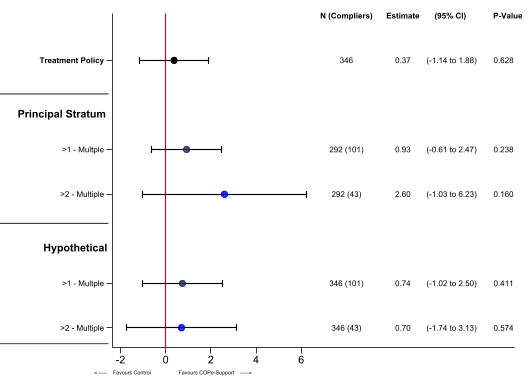

In [12]:
* ---------------------------------------------
* Generate the Graph
* ---------------------------------------------

local all_otxt ""
local xpos = 8
local xpos_est = `xpos' + 2.5
local xpos_ci = `xpos' + 3.5
local xpos_ci_title = `xpos_ci' + 1.1
local xpos_pval = `xpos' + 6.5

levelsof row , local(rlvl)
foreach r of local rlvl {
	
	local z = `r' + 1 // rows start at 1 not 0
	local nn = N[`z']
	local estimate = Estimate[`z'] 
	local lci = LCI[`z']
	local uci = UCI[`z']
	local pval = Pval[`z']
	
	if "`estimate'" == "." {
		local n_str = ""
		local e_str = "" 
		local ci_str = ""
		local p_str = ""
		local est_str = "" // Must be empty for Graph
	}
	else {
		local n_str = "`nn'"
		local e_str = string(`estimate', "%3.2f")
		local lci_str = string(`lci', "%3.2f")
		local uci_str = string(`uci', "%3.2f")
		local ci_str = "(`lci_str' to `uci_str')"
		local p_str = string(`pval', "%4.3f")
		local est_str = "`e_str' `ci_str' `p_str'"
	}
	
	#delimit ;
		local otxt `" text(`r' `xpos' "`n_str'", size(vsmall) place(c))
					 text(`r' `xpos_est' "`e_str'" , size(vsmall) place(c)) 
					 text(`r' `xpos_ci' "`ci_str'" , size(vsmall) place(e))
					 text(`r' `xpos_pval' "`p_str'" , size(vsmall) place(e)) "'
	;
	#delimit cr
	local all_otxt "`all_otxt' `otxt' "
		
}

local alline ""

forvalues i = 0/7 {
	local ciline `" (rcap LCI UCI row if row == `i', hor lcolor(black))"'
	local alline "`alline' `ciline'"
}

#delimit ;
	twoway 
		`alline' // First so at back of graph
		(scatter row Estimate if Estimand == 1, mcolor(black))
		(scatter row Estimate if Complier == 1, mcolor(dknavy%80))
		(scatter row Estimate if Complier == 2, mcolor(blue%80))
		(scatter row Estimate if Complier == 4, mcolor(gs10))
		, 
			plotr(style(none) m(r+52 t+10 b+3)) /* Need to change margin if Posteior Included */
			scheme(s1color)
			xline(0)
			yscale(range(1(1)6))
			ylabel(0(1)1 3(1)4 6 , angle(hori) valuelabels labsize(vsmall))
			ytitle(" " , m(r+3) size(small))
			xlabel( , labsize(small))
			legend(off)
			//title("Estimate (95% CI)", size(small) m(b+3))
			name(forrest, replace)
			
			text(7 `xpos' "{bf:N (Compliers)}", size(vsmall) place(c))
			text(7 `xpos_est' "{bf:Estimate}", size(vsmall) place(c))
			text(7 `xpos_ci_title' "{bf:(95% CI)}" , size(vsmall) place(c))
			text(7 `xpos_pval' "{bf:P-Value}" , size(vsmall) place(e))
			`all_otxt'
			
			text(-1 -1.5 "Favours Control", size(tiny))
			text(-0.95 -2.8 "___" , size(tiny))
			text(-1.01 -3.1 "<" , size(tiny))
			text(-1 1.8 "Favours COPe-Support", size(tiny))
			text(-0.95 3.5 "___" , size(tiny))
			text(-1.01 3.75  ">" , size(tiny))
			
			text(4.8 -4.6 "{bf:Principal Stratum}" , size(small))
			text(1.8 -4 "{bf:Hypothetical}" , size(small))
			text(5.4 -5 "_______________")
			text(2.5 -5 "_______________")
			text(-0.2 -5 "_______________")
;
#delimit cr